In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import cmocean
import xarray as xa
import cartopy.crs as ccrs

import sys
sys.path.insert(1, '/Users/tpvan/Waves/ocean_wave_tracing')

from ocean_wave_tracing.ocean_wave_tracing import Wave_tracing

%matplotlib inline

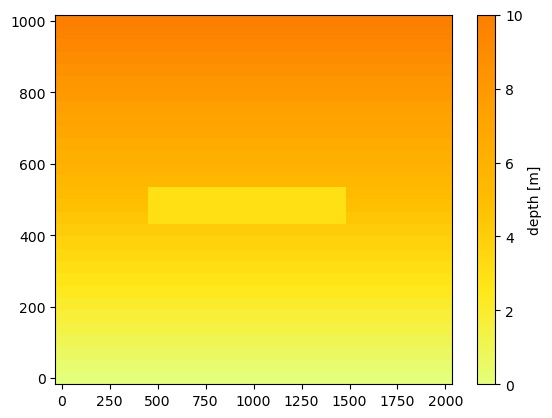

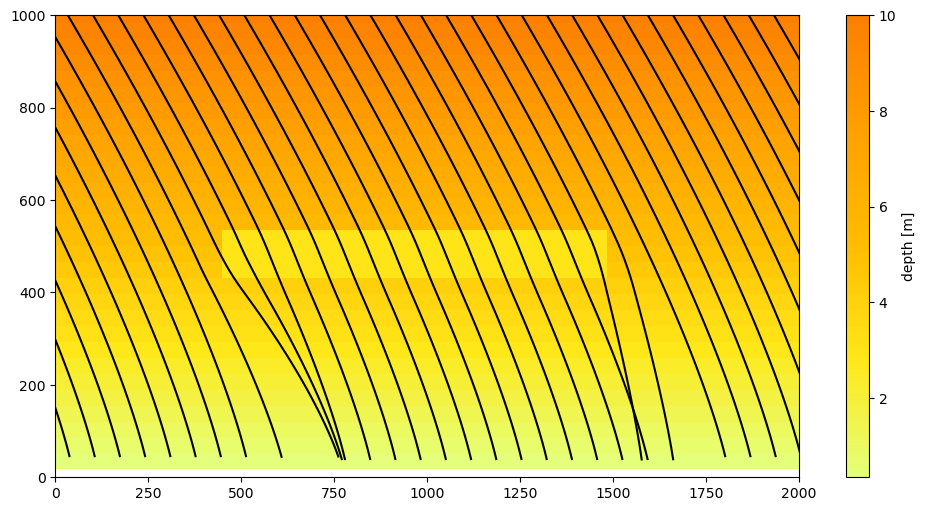

In [2]:
nx = 30; ny = 30 # number of grid points in x- and y-direction
x = np.linspace(0,2000,nx) # size x-domain [m]
y = np.linspace(0,1000,ny) # size y-domain [m]
T = 300 # simulation time [s]
U=np.zeros((ny,nx))
V=np.zeros((ny,nx))
# U[ny//2:,:]=1

rays=60

d_off = 10
d_bw = 3

d = np.ones((ny, nx)) * d_off

for i in range(ny):
    d[i, :] -= np.ones(nx) * d_off * (1 - i / (ny - 1))



d[int(ny//2-ny/20):int(ny//2+ny/20), int(nx//2-nx/4):int(nx//2+nx/4)] = np.ones((int(ny/10), int(nx/2))) * d_bw

xv, yv = np.meshgrid(x, y)
fig, ax = plt.subplots();
pc=ax.pcolormesh(xv,yv,d,shading='auto', cmap='Wistia')
dc=fig.colorbar(pc)
dc.set_label('depth [m]')

# Define a wave tracing object
wt = Wave_tracing(U=U,V=V,
                       nx=nx, ny=ny, nt=100,T=T,
                       dx=x[1]-x[0],dy=y[1]-y[0],
                       nb_wave_rays=rays,
                       domain_X0=x[0], domain_XN=x[-1],
                       domain_Y0=y[0], domain_YN=y[-1],
                       d=d)

# Set initial conditions
wt.set_initial_condition(wave_period=10,
                          theta0=-0.3*np.pi, ipx=np.linspace(-2000, 2000, rays), ipy=np.ones(rays)*1000)

# Solve
wt.solve()

# Plot
fig, ax = plt.subplots(figsize=(12, 6));
# pc=ax.pcolormesh(wt.x,wt.y,wt.U.isel(time=0),shading='auto', cmap='Wistia')
pc=ax.pcolormesh(wt.x,wt.y,wt.d,shading='auto', cmap='Wistia')
dc=fig.colorbar(pc)
dc.set_label('depth [m]')

for ray_id in range(wt.nb_wave_rays):
    ax.plot(wt.ray_x[ray_id,:],wt.ray_y[ray_id,:],'-k')

plt.xlim(x.min(), x.max())
plt.ylim(y.min(), y.max())

# ax.quiver(x, y, U ,V)
plt.show()

In [3]:
# ### PLOTTING

# import cartopy.crs as ccrs
# import cartopy.feature as cfeature

# data_crs = ccrs.PlateCarree()
# crs_kws = dict(projection=ccrs.Mercator(),facecolor='gray')
# geodetic = ccrs.Geodetic(globe=ccrs.Globe(datum='WGS84'))

# # SET plot extent
# lonmin, lonmax, latmin, latmax = -117.7, -117.2, 32.66, 33.26
# plot_extent = [lonmin, lonmax, latmin, latmax]

# #lscale='full'
# lscale='intermediate'
# f = cfeature.GSHHSFeature(scale=lscale, levels=[1],
#         facecolor=cfeature.COLORS['land'])

# #Fontsize
# fs=12

In [4]:
da = xa.open_dataset('data_waves/depth.nc')
depth = -15 - da.elevation.values  # might need to tweak this

depth = depth.astype(np.float32)

In [11]:
da.max()

<xarray.Dataset> Size: 2B
Dimensions:    ()
Data variables:
    elevation  int16 2B 440

In [5]:
# SET conditions for wave tracing

# Domain
X = da.lon
Y = da.lat
X0, XN = X[0].data, X[-1].data
Y0, YN = Y[0].data, Y[-1].data

# Resolution
nx = len(X)
ny = len(Y)

x = np.linspace(X0,XN,nx) # size x-domain [m]
y = np.linspace(Y0,YN,ny) # size y-domain [m]

uu = np.zeros((ny,nx))
vv = np.zeros((ny,nx))

# Number of rays
nb_wave_rays = 140

# Duration (in seconds)
T = 1.2 * 3600

# Number of discrete time steps
nt = 400

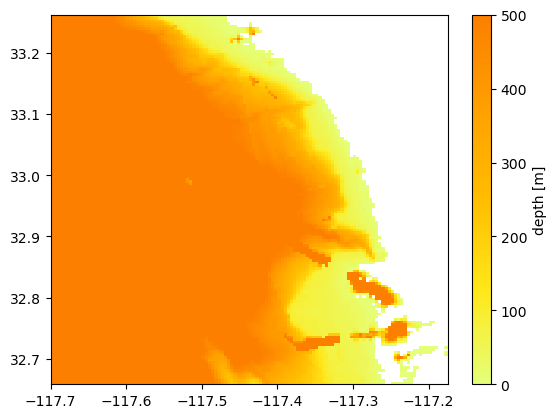

In [13]:
xv, yv = np.meshgrid(x, y)

fig, ax = plt.subplots();
pc=ax.pcolormesh(xv,yv,depth,shading='auto', cmap='Wistia', vmin=0, vmax=1000)
dc=fig.colorbar(pc)
dc.set_label('depth [m]')

In [7]:
# # Initial conditions

# wave_period = 13 # [s]
# theta0 = np.ones(nb_wave_rays)*(-0.57*np.pi) # [rad]

# # Initial position
# # Here, it is also possible to set a side of the domain (i.e. left, right, top, bottom):
# # incoming_wave_side = 'top'
# ipx = np.linspace(1.2e6,1.25e6,nb_wave_rays) # initial position x
# ipy = np.ones(nb_wave_rays)*5.35e5 # initial position y

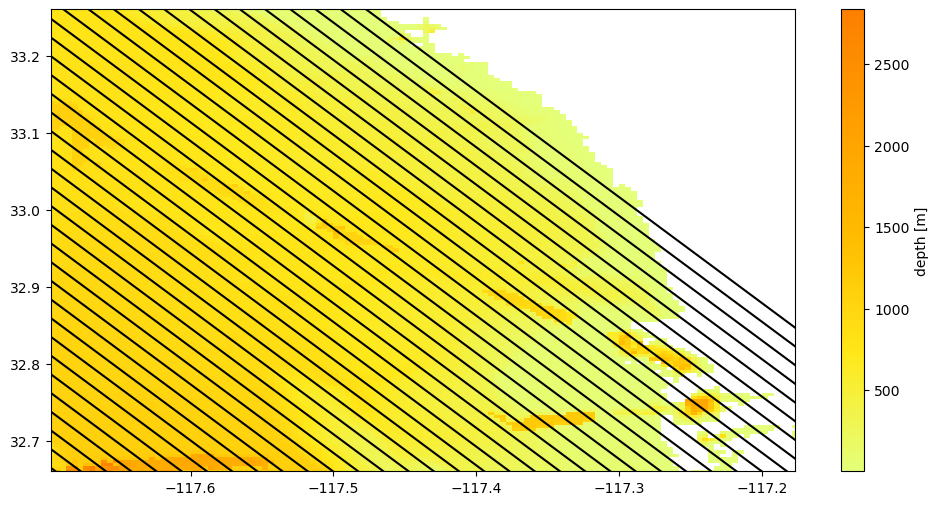

In [8]:
# Define a wave tracing object
wt = Wave_tracing(U=uu, V=vv,
                       nx=nx, ny=ny, nt=nt,T=T,
                       dx=x[1]-x[0],dy=y[1]-y[0],
                       nb_wave_rays=rays,
                       domain_X0=X0, domain_XN=XN,
                       domain_Y0=Y0, domain_YN=YN,
                       d=depth)

# Set initial conditions
wt.set_initial_condition(wave_period=13,
                          theta0=-0.3*np.pi, ipx=np.linspace(2 * X0 - XN, XN, rays), ipy=np.ones(rays)*YN)

# Solve
wt.solve()

# Plot
fig, ax = plt.subplots(figsize=(12, 6));
pc=ax.pcolormesh(wt.x,wt.y,wt.d,shading='auto', cmap='Wistia')
dc=fig.colorbar(pc)
dc.set_label('depth [m]')

for ray_id in range(wt.nb_wave_rays):
    ax.plot(wt.ray_x[ray_id,:],wt.ray_y[ray_id,:],'-k')

plt.xlim(x.min(), x.max())
plt.ylim(y.min(), y.max())

plt.show()